In [1]:
# import thư viện
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
# đọc dữ liệu
df = pd.read_csv("../Data/ms_admission.csv")

In [3]:
# kiểm tra giá trị null
print(df.isna().sum())

gre         0
admitted    0
dtype: int64


In [4]:
# mô tả các giá trị mean min max std
print(df.describe())

              gre    admitted
count  400.000000  400.000000
mean   587.700000    0.317500
std    115.516536    0.466087
min    220.000000    0.000000
25%    520.000000    0.000000
50%    580.000000    0.000000
75%    660.000000    1.000000
max    800.000000    1.000000


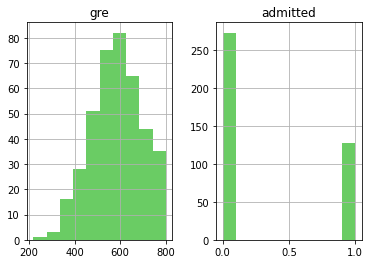

In [5]:
# Generate histograms
sns.set_color_codes('muted')
df.hist(color='g')
plt.show()

In [6]:
# gán biến độc lập cho X và biến phụ thuộc cho y
X = df[['gre']]
y = df['admitted']

In [7]:
# chia tập dữ liệu huấn luyện và kiểm thử
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=5)

In [8]:
# tạo mô hình hồi quy
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [9]:
# tiên lượng dựa trên tập dữ liệu kiểm thử với 0 là not_admitted và 1 là admitted
y_predictions = model.predict(X_test)
print(y_predictions)

[0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0]


Confusion Matrix:
 [[134   7]
 [ 49  10]]


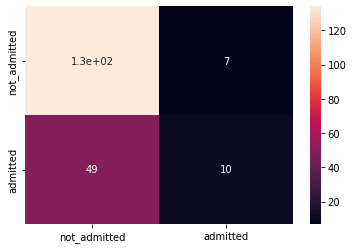

<Figure size 216x216 with 0 Axes>

In [10]:
# vẽ ma trận nhầm lẫn sử dụng biểu đồ nhiệt heatmap
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_predictions))
confusion_matrix = confusion_matrix(y_test, y_predictions)
sns.heatmap(confusion_matrix, annot=True, xticklabels=['not_admitted', 'admitted'],
            yticklabels=['not_admitted', 'admitted'])
# sns.heatmap(confusion_matrix, annot=True)
plt.figure(figsize=(3, 3))
plt.show()

In [11]:
# xem class probabilities
probabilities = model.predict_proba(X_test)
print(probabilities)

[[0.77545179 0.22454821]
 [0.44324912 0.55675088]
 [0.5507212  0.4492788 ]
 [0.61361363 0.38638637]
 [0.81732049 0.18267951]
 [0.59295951 0.40704049]
 [0.69163718 0.30836282]
 [0.69163718 0.30836282]
 [0.74397398 0.25602602]
 [0.77545179 0.22454821]
 [0.70973526 0.29026474]
 [0.61361363 0.38638637]
 [0.50773855 0.49226145]
 [0.44324912 0.55675088]
 [0.72719012 0.27280988]
 [0.65365765 0.34634235]
 [0.67293069 0.32706931]
 [0.69163718 0.30836282]
 [0.5507212  0.4492788 ]
 [0.63386684 0.36613316]
 [0.59295951 0.40704049]
 [0.57197147 0.42802853]
 [0.63386684 0.36613316]
 [0.52928416 0.47071584]
 [0.65365765 0.34634235]
 [0.74397398 0.25602602]
 [0.63386684 0.36613316]
 [0.61361363 0.38638637]
 [0.59295951 0.40704049]
 [0.50773855 0.49226145]
 [0.72719012 0.27280988]
 [0.44324912 0.55675088]
 [0.67293069 0.32706931]
 [0.61361363 0.38638637]
 [0.70973526 0.29026474]
 [0.52928416 0.47071584]
 [0.5507212  0.4492788 ]
 [0.63386684 0.36613316]
 [0.57197147 0.42802853]
 [0.81732049 0.18267951]


In [12]:
# kiểm tra độ chính xác của mô hình
from sklearn import metrics
print("Accuracy Score:", metrics.accuracy_score(y_test, y_predictions))

Accuracy Score: 0.72


In [13]:
# in classification report
print("\nClassification Report:\n", metrics.classification_report(y_test, y_predictions))


Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.95      0.83       141
           1       0.59      0.17      0.26        59

    accuracy                           0.72       200
   macro avg       0.66      0.56      0.55       200
weighted avg       0.69      0.72      0.66       200



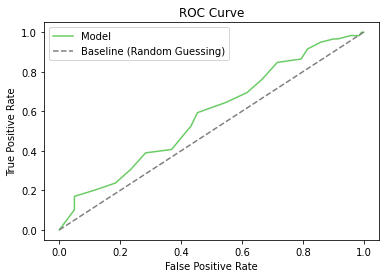

Area Under the Curve: 0.5800576992426975


In [14]:
# plotting ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, probabilities[:, 1])
results = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr})
plt.plot(fpr, tpr, color='g', label="Model")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label="Baseline (Random Guessing)")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
print("Area Under the Curve:", metrics.roc_auc_score(y_test, probabilities[:, 1]))

In [15]:
# save model
import pickle
with open('./models/model_Logistic_SingVariable', 'wb') as f:
    pickle.dump(model, f)